# ANN for regression, exercise project 1 - Diamonds

## Dependancies

In [40]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#for data analyzing
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [33]:
df = pd.read_csv("data/data.csv")

In [34]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


The first important thing I see is that the variables 'Gender' and 'Interest' are both categorial, but they don't follow any ordinal pattern. We will have to either represent them using binary or seperate them using OneHotEncoder.

In [35]:
df.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

No NAs

## Analyzing the data

Before we handle the data, we will analyze if there is anything interesting to note.

### YData-Profiling

In [36]:
# Generate the data profiling report, title is just 
report = ProfileReport(df, title='Predict Personality Types - Deep Learning course')

# create either an HTML -page or show it straight in the notebook
# sometimes the HTML -page is easier to browse!
report.to_file("html/ydata_data_report.html")
#report.to_notebook_iframe()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 76.90it/s]


### AutoViz

In [41]:
# FOR SUMMARY TABLE:
AV = AutoViz_Class()
report = AV.AutoViz(df)

Shape of your Data Set loaded: (128061, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variabl

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,float64,0.000000,NA,18.000000,57.000000,Column has 2692 outliers greater than upper bound (38.00) or lower than lower bound(14.00). Cap them or remove them.
Gender,object,0.000000,0,,,No issue
Education,int64,0.000000,0,0.000000,1.000000,No issue
Introversion Score,float64,0.000000,NA,0.000040,9.999990,No issue
Sensing Score,float64,0.000000,NA,0.000000,9.788815,Column has 1161 outliers greater than upper bound (8.26) or lower than lower bound(1.95). Cap them or remove them.
Thinking Score,float64,0.000000,NA,0.000050,9.999970,No issue
Judging Score,float64,0.000000,NA,0.000000,9.840494,Column has 1500 outliers greater than upper bound (8.34) or lower than lower bound(0.93). Cap them or remove them.
Interest,object,0.000000,0,,,No issue
Personality,object,0.000000,0,,,"4 rare categories: ['ESFJ', 'ESTJ', 'ISFJ', 'ISTJ']. Group them into a single category or drop the categories."


Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 14 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [42]:
# FOR VISUALIZATIONS:
AV = AutoViz_Class()
report = AV.AutoViz(df, chart_format="bokeh", depVar="Personality")

Shape of your Data Set loaded: (128061, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'53c7a353-5102-4093-b02e-9bf3820f71c7': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'a02214bb-187a-4e1e-831d-cb6bc1d1e489': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'f0b8f089-7d05-4ffb-83d7-1463da1fa1fc': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'d5f05840-4d85-4956-a56f-4024543cd3e4': {'version…

KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


BokehModel(combine_events=True, render_bundle={'docs_json': {'8fb6dd0d-5ea4-4129-a20a-dd77bca27628': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'202fef29-e0cf-4b40-a7e9-3e8c3f850d0b': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'05ec9e02-a14b-4a84-a397-77bb39cb8de1': {'version…

Time to run AutoViz (in seconds) = 35


### SweetViz

In [37]:
# analyze and create HTML-report
report = sv.analyze(df)
report.show_html('html/sv_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report html/sv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Findings

#### Distribution

The distributions overall seem to be very balanced, 

## Categorial variables

Let's first look at how many categories of each variable there are.

In [9]:
df['Gender'].value_counts()

Gender
Male      70432
Female    57629
Name: count, dtype: int64

Only two, so we can represent them using binary.

In [7]:
df['Interest'].value_counts()

Interest
Unknown       48835
Arts          25489
Others        21733
Technology    19103
Sports        12901
Name: count, dtype: int64

More than two, we will have to use OneHotEncoder and then delete the Unknown column, since that gives us the least bit of information.

### 'Gender' variable

First, we will convert both Genders to binary. Let's do 0 for 'Female' and 1 for 'Male'.

In [15]:
# Applying the function to the housing list
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [16]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Since future readers won't know what 0 and 1 means, we will rename the 'Gender' variable to 'isMale'.

In [18]:
df = df.rename({'Gender':'isMale'}, axis=1)

### 'Interest' variable

This one is pretty simple, we will first use OneHotEncoder.

In [23]:
# this makes multiple columns with the variable (Separate for yes/no)
variables = ['Interest']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [24]:
df.head()

,Age,isMale,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest_Arts,Interest_Others,Interest_Sports,Interest_Technology,Interest_Unknown
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,ENFP,0,0,0,0,1
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,0,1,0,0
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,ENFP,0,0,0,0,1
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,INTP,0,1,0,0,0
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,0,0,1,0


Now we just need to drop one of these columns. Though it doesn't matter which column to drop, I will chose 'Interest_Unknown'. Since it's very logical to assume that the interest is unknown if none of the options are selected.

In [25]:
df = df.drop('Interest_Unknown', axis=1)

In [186]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


## Scaling the values

I will leave this out for now, this gave me weird results, I don't think that these values should be scaled.

In [187]:
# num_vars = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price','x','y','z']

# from sklearn.preprocessing import MinMaxScaler
# scaler_with_price = MinMaxScaler()
# df[num_vars] = scaler_with_price.fit_transform(df[num_vars])

## Creating the regression model

In [188]:
# printing out the column names for easier copying for X/y
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [189]:
# define independent variable
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']]

# define dependant variable
y = df['price']

In [190]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [191]:
variable_amount = len(X.columns)

In [192]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 37758
Test data amount: 8091
Validation data amount: 8091


### First Model

First, let's just try to stick to layers with a high node count.

In [ ]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=(variable_amount,)),  # 1st layer with 64 neurons
        layers.Dense(128),  # 2nd layer with more neurons to learn complex patterns
        layers.Dense(64),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 12829716.0000 - val_loss: 2414556.7500
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2472094.7500 - val_loss: 2405726.2500
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2286133.5000 - val_loss: 2261061.2500
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2152613.0000 - val_loss: 2257363.2500
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2114351.0000 - val_loss: 1988386.1250
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1991100.3750 - val_loss: 1869404.7500
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1883266.5000 - val_loss: 1721256.0000
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1783721.5000 - val_loss: 1607799.8750
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1612769.1250 - val_loss: 1580184.7500
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1580972.0000 - v

In [ ]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1514444.125

Train data evaluation:
1479049.5


These numbers are only around 40 000$ apart.

In [ ]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Test True Y,Model Predictions
0,3407,3983.067871
1,11631,8470.007812
2,18741,14237.662109
3,2285,3326.087646
4,648,-358.225311
...,...,...
8086,1985,2581.689209
8087,475,-468.497070
8088,2351,2043.194580
8089,945,931.697449


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

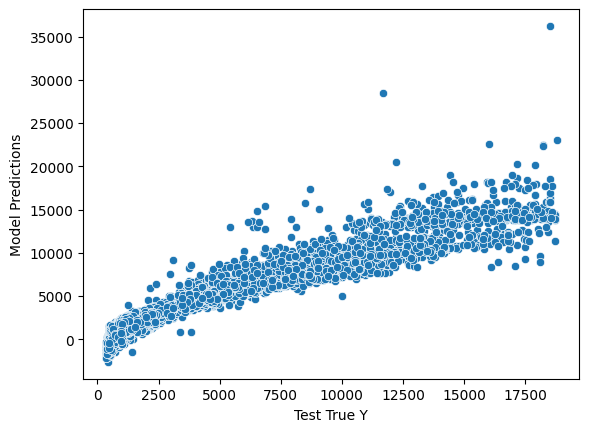

In [ ]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

This scatterplot is very messy, there seems to be a coherant line following through the plot, but it's way to unorganized.

In [ ]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
816.31 $

MSE
1514444.07 $^2

RMSE:
1230.63 $

R-squared:
0.91

Explained variance score:
0.91


These are pretty good numbers.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


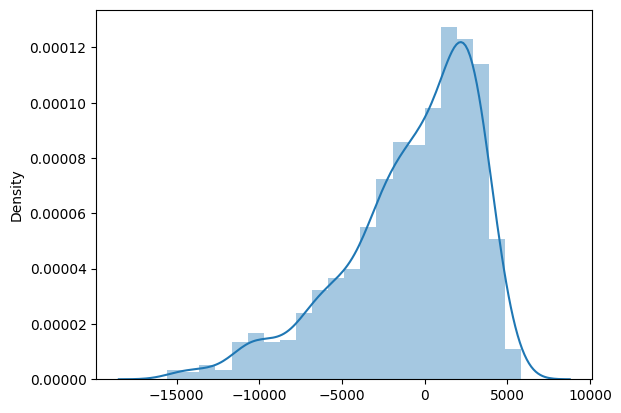

In [ ]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

This looks like a pretty normal distribution.

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

To test how accurate the prediction is, I also put these stats into various online calculators:

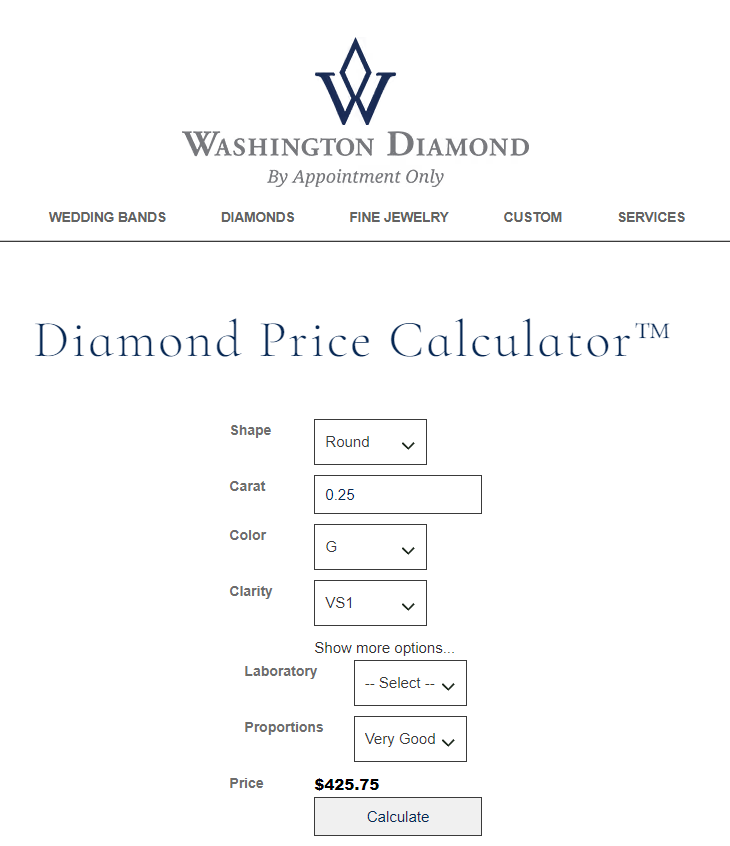

https://www.washingtondiamond.com/diamond-price-calculator

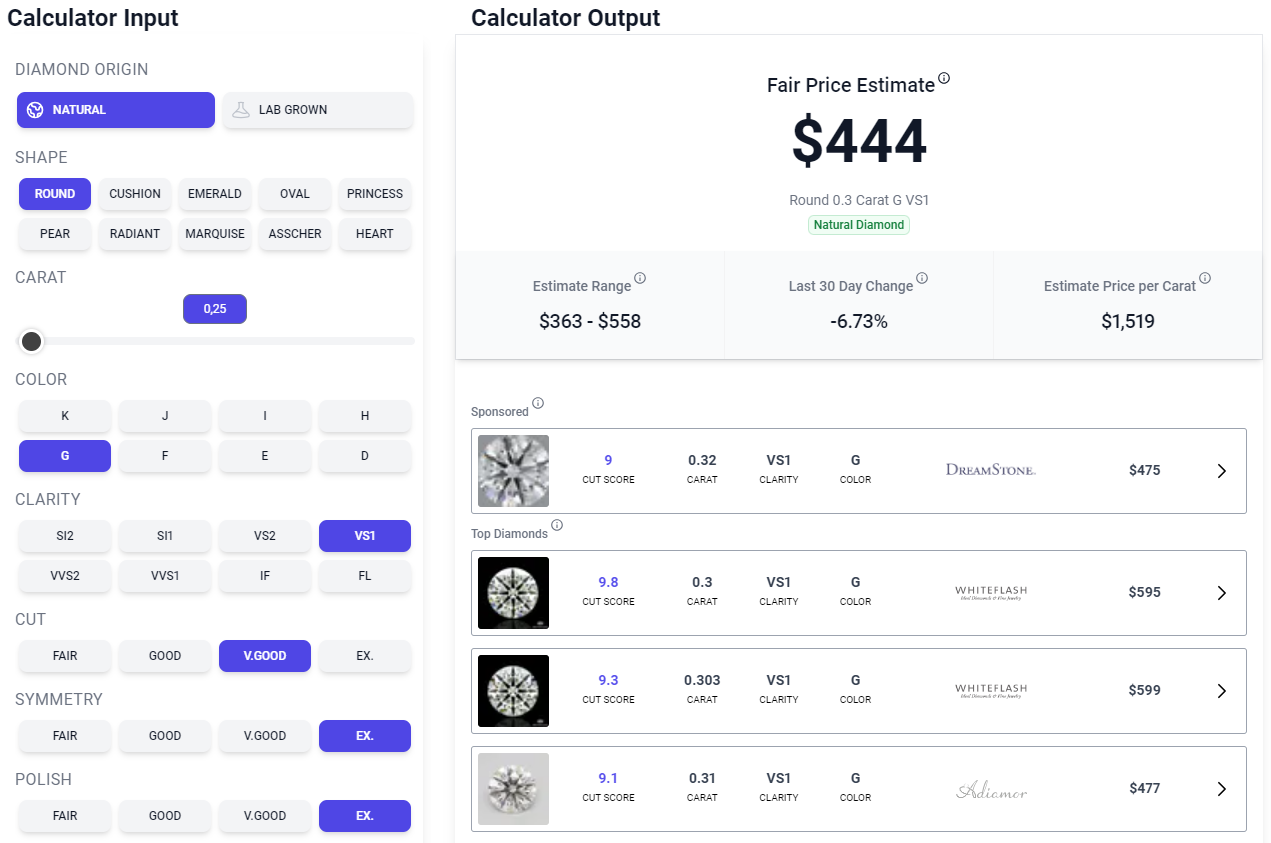

https://www.stonealgo.com/diamond-price-calculator/calc?a=1&b=0.3&c=5&d=4&e=3&f=4&g=4&h=5&i=0

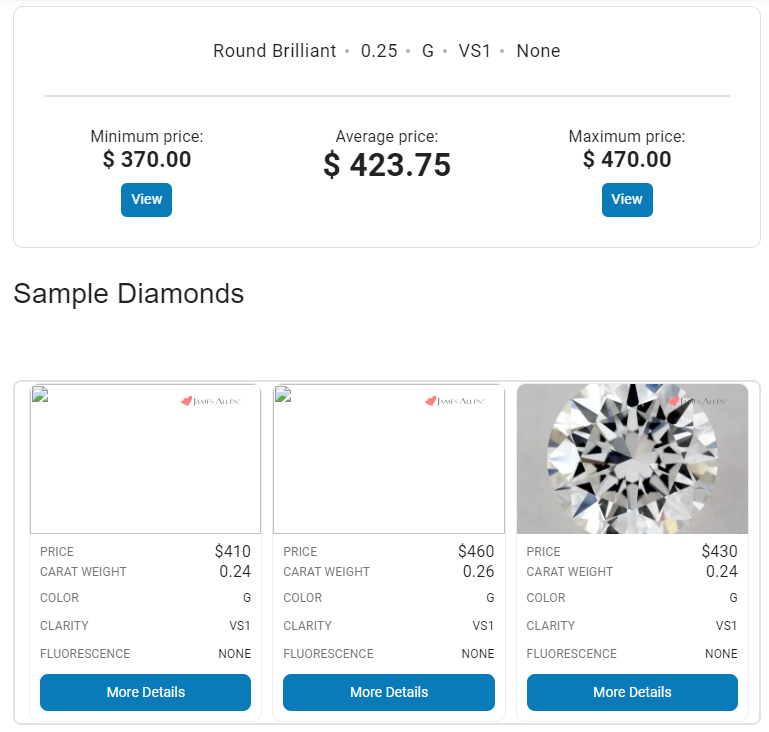

https://www.diamonds.pro/education/diamond-price-calculator/

I have also used these online tools to test if some prices of the diamonds from the dataset could be guessed correctly.<br>
And in many instances the online tools were able to guess very good, being only around 10% off of the actual prices. Which means these tools CAN be very accurate.

Which could suggest that the actual price of the sample diamond for the estimation would be around 430$.

In [ ]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Estimated price for this diamond:
-827.38 $
----------------


This model seems very broken.

In [ ]:
len(y_test)

8091

### Second Model

Let's try to add a few dropouts to avoid overfitting.

In [193]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=(variable_amount,)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu"),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu"),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16931998.0000 - val_loss: 2236370.5000
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1850652.3750 - val_loss: 1391867.3750
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1150831.3750 - val_loss: 1134576.8750
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1088651.3750 - val_loss: 1167769.8750
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1048490.3750 - val_loss: 1144006.3750
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1073135.3750 - val_loss: 1123325.1250
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1003942.9375 - val_loss: 1123016.0000
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1012911.3125 - val_loss: 1112590.0000
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 939235.3125 - val_loss: 1109268.0000
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1094027.3750 - va

<Axes: >

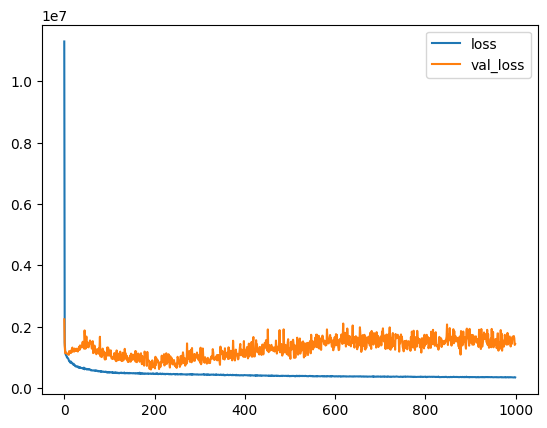

In [195]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Since validation loss is above the training loss, this could suggest that this model has a lot of overfitting.

In [196]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1272260.125

Train data evaluation:
1175843.25


They are only 100 000 values apart, that's not that bad.

In [197]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Test True Y,Model Predictions
0,3407,3027.212402
1,11631,9859.205078
2,18741,13892.782227
3,2285,2061.122314
4,648,565.514160
...,...,...
8086,1985,1739.689575
8087,475,597.237854
8088,2351,1793.433472
8089,945,895.942871


The guesses seem to be very close sometimes.

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

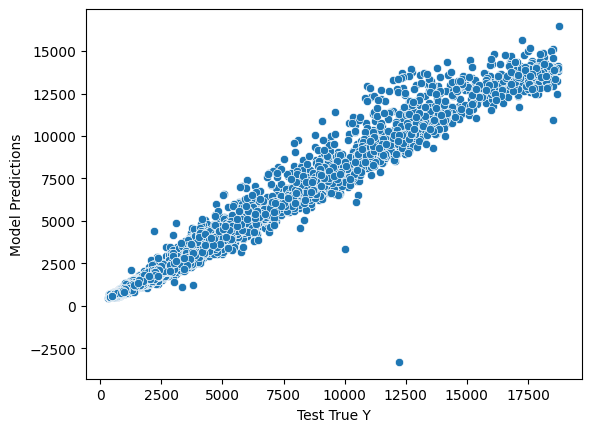

In [198]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

The scatterplot also seems to have a logical line that it follows, there are a few extreme outliers though. Also, it seems the more expensive the diamonds get, the less accurate the predictions are.<br>
The reason for this could be, that higher priced diamonds get a bit more complex when it comes to pricing. Since there can be more factors catering into that, for example the brand, rarity, historical relevance, luxury value, market demand etc.<br>
This could also explain some of the outliers.<br>
If we examine the scatterplot closely, we can see, that the logical line gets less accurate and doesn't line up that well after around 10 000$. The model seems to underpredict a lot of values here.

In [199]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
696.04 $

MSE
1272259.74 $^2

RMSE:
1127.94 $

R-squared:
0.92

Explained variance score:
0.95


We already have some pretty good values here, although the MAE seems to be pretty high, considering that the prices for the diamonds ranges from 326$ up to 18 823$.<br>
RMSE is also pretty high, but R-squared and the explained variance score are already pretty high, meaning we're really close to creating the most accurate model.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


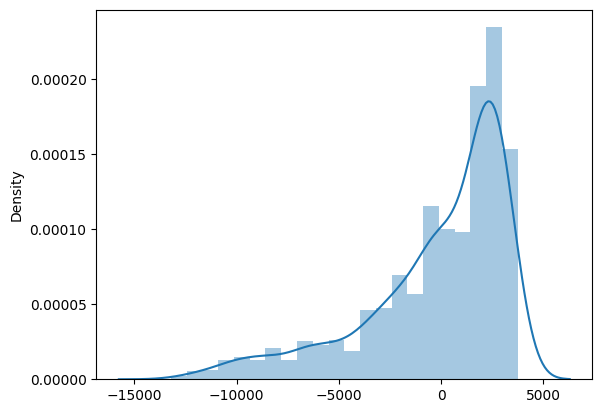

In [200]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

This plot has weird distributions. I mean you could somewhat say it's distribution is normal, since both sides are balanced when you look at the numbers distributed on both sides.<br>
But somehow..
<ul>
 <li>when underpredicting the values, the model seems to be very consistent and dense.</li>
 <li>when overpredicting the values, the model seems to get very inconsistend and complex.</li>
 </ul>

 The amount it overpredicts is also very high, considering the underpredicting never passes 5 000$ while overpredicting  reaches up to 15 000$ divergence.<br>
 We already saw a pattern for this in the scatterplot, it seems that the model gets very inconsistend in the higher price ranges. It could be, that the dataset does not have that many accurate high priced examples to learn accurate predictions. This could be an explanation for the high amount of variance.

In [201]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [202]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [203]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Estimated price for this diamond:
653.86 $
----------------


This is 230$ too high.

In [176]:
len(y_test)

8091

### Third model

The first model already seems kind of accurate, but it has it's problems.<br>
Let's try to add a batch normalization to maybe even out the higher values a bit.

In [204]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(64, activation="relu"),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu"),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu"),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_11          │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,317 (67.64 KB)

 Trainable params: 17,299 (67.57 KB)

 Non-trainable params: 18 (72.00 B)

In [205]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11679706.0000 - val_loss: 1338482.6250
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1967118.2500 - val_loss: 1205968.5000
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1880232.1250 - val_loss: 1227333.3750
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1782987.8750 - val_loss: 1060915.3750
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1660088.3750 - val_loss: 996709.2500
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1713045.6250 - val_loss: 1158158.1250
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1699121.2500 - val_loss: 919602.1250
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1774451.0000 - val_loss: 883695.3125
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 1651884.8750 - val_loss: 871804.3750
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1693659.5000 - val_l

<Axes: >

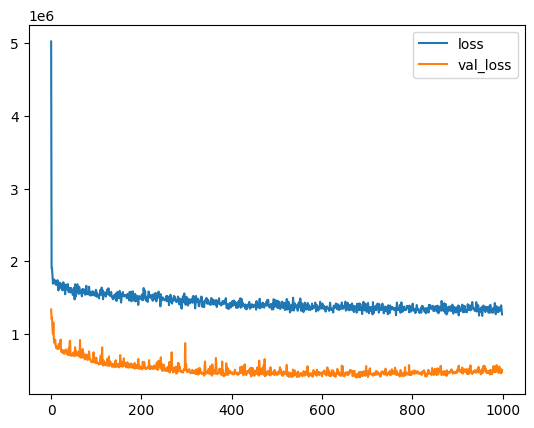

In [206]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

It seems that with the batch normalization we got rid of the heavy overfitting.

In [207]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
581077.8125

Train data evaluation:
457651.78125


The difference between those two got higher, to around 125 000$. It's only 25 000$ higher though.

In [208]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test True Y,Model Predictions
0,3407,4017.305176
1,11631,11066.915039
2,18741,14890.302734
3,2285,2779.824707
4,648,669.920959
...,...,...
8086,1985,2204.376221
8087,475,634.966553
8088,2351,2458.319580
8089,945,1490.443848


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

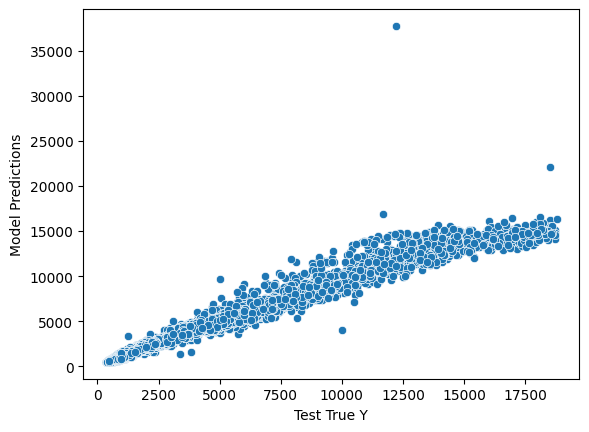

In [209]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

The scatterplot doesn't seem to have changed that much, it still gets very inaccurate after around 10 000$. And there seems to be a few very strong outliers.

In [210]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
405.94 $

MSE
581077.71 $^2

RMSE:
762.28 $

R-squared:
0.96

Explained variance score:
0.96


These values seem to have changed quite a bit. With both lower MAE and RMSE and higher R-squared and explained variance score. So the batch normalization helped to get the data a bit more consistend.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


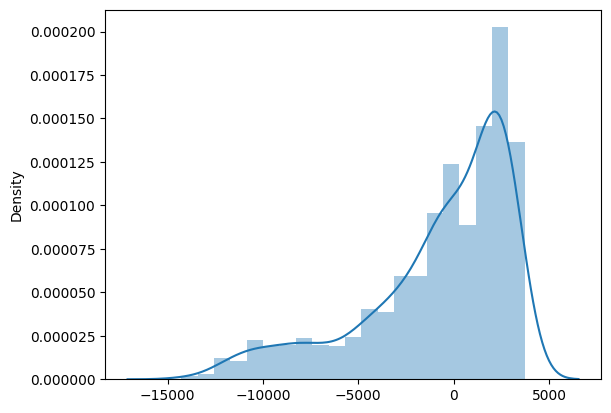

In [211]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

This still looks kind of the same as before, but it got a bit more consistend at around -10 000$.

In [212]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [213]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [214]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Estimated price for this diamond:
1230.27 $
----------------


The estimated price got doubled. It's now around 800$ more than the other estimation.

In [215]:
len(y_test)

8091

### Fourth model

Since overfitting seemed to be a problem in the first model, we could also try to use a few l2 regularizers to counter this.

In [216]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=(variable_amount,), activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 15433482.0000 - val_loss: 1299371.3750
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1431712.7500 - val_loss: 1153861.8750
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1085852.8750 - val_loss: 1163277.8750
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1061021.6250 - val_loss: 1284759.2500
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1088608.7500 - val_loss: 1147245.1250
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1001449.3750 - val_loss: 1158885.2500
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 968539.2500 - val_loss: 1138786.6250
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 925943.5000 - val_loss: 1155406.2500
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 916849.0625 - val_loss: 1105408.5000
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 881323.8750 - val_l

<Axes: >

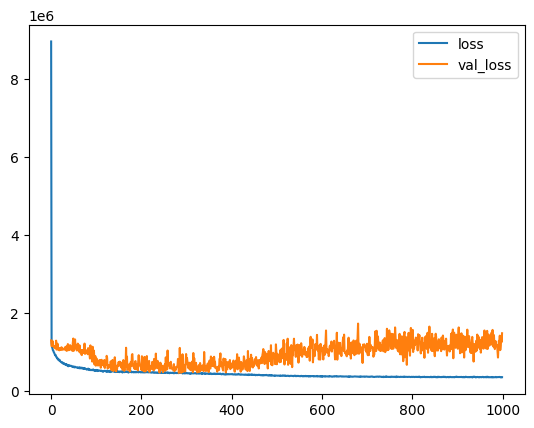

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

It still has a bit of overfitting, but it is lower than the first model.

In [219]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1372030.75

Train data evaluation:
1282275.125


The numbers are now only 90 000$ apart, which is even less than the first model.

In [220]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Test True Y,Model Predictions
0,3407,3199.681885
1,11631,8921.510742
2,18741,14472.982422
3,2285,2202.135498
4,648,613.953918
...,...,...
8086,1985,1723.374023
8087,475,620.446960
8088,2351,2048.654053
8089,945,1076.151489


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

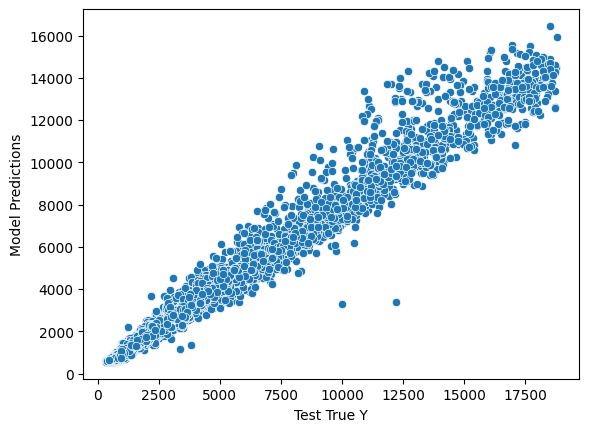

In [221]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

The scatterplot still seems to have the same problem, where it gets inaccurate after 10 000$, but it seems that a few outliers try to balance that.

In [222]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
686.08 $

MSE
1370489.73 $^2

RMSE:
1170.68 $

R-squared:
0.92

Explained variance score:
0.94


The numbers are all pretty good, but these are still the worst numbers we had until now.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


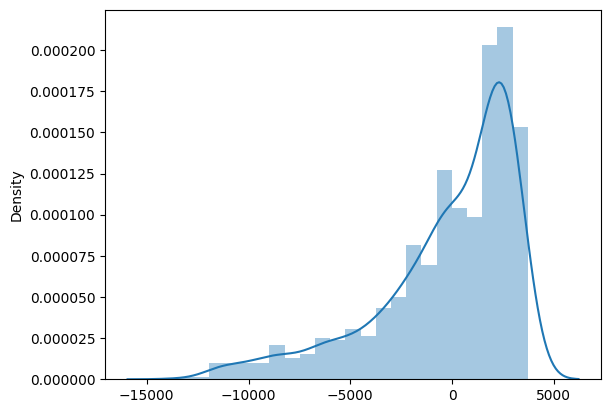

In [223]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

Still the same problem, doesn't seem to be managed that well without the batch normalization.

In [224]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [225]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [226]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Estimated price for this diamond:
630.65 $
----------------


This is closer to the actual estimated diamond, it's now only 200$ off.

In [227]:
len(y_test)

8091

### Fifth model

Since the batch normalization helped a bit by balancing a few numbers and the regularizers helped the overfitting, let's try to combine those two.

In [228]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_12          │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,317 (67.64 KB)

 Trainable params: 17,299 (67.57 KB)

 Non-trainable params: 18 (72.00 B)

In [229]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 12085304.0000 - val_loss: 1341873.3750
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1915367.1250 - val_loss: 1352258.5000
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1884170.7500 - val_loss: 1358003.7500
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1937041.7500 - val_loss: 1183941.0000
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1873818.2500 - val_loss: 1138614.7500
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1786869.8750 - val_loss: 1180709.5000
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1830355.1250 - val_loss: 1164312.0000
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1760342.8750 - val_loss: 1172148.0000
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1858977.8750 - val_loss: 1134210.2500
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1725258.5000 - v

<Axes: >

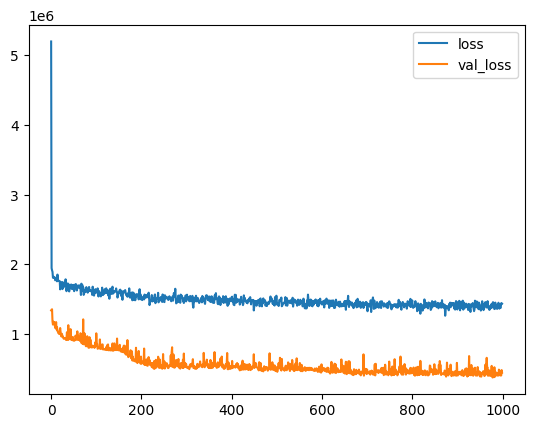

In [230]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

This distplot looks very similiar to the one from the second model, but it seems as though the distance between the validation loss and the training loss is a bit shorter.

In [231]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
528735.9375

Train data evaluation:
450120.125


These numbers are now only 80 000$ apart, that's the best one yet.

In [232]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Test True Y,Model Predictions
0,3407,3908.498779
1,11631,10853.921875
2,18741,14810.000977
3,2285,2511.038330
4,648,677.296997
...,...,...
8086,1985,1944.379761
8087,475,650.326416
8088,2351,2404.364746
8089,945,1533.210693


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

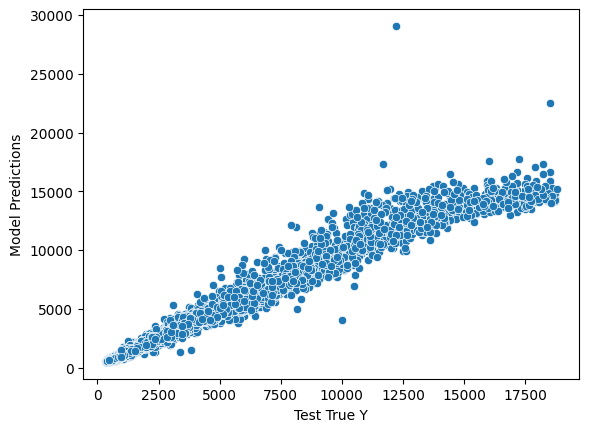

In [233]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

The falloff is now way less appearant after the 10 000$ mark. There are still a few strong outliers, but this is the best scatterplot we had up until this point. It does seem to lose track again after around 15 000$.

In [234]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
385.03 $

MSE
527242.48 $^2

RMSE:
726.11 $

R-squared:
0.97

Explained variance score:
0.97


These numbers are also the best we've had until now.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


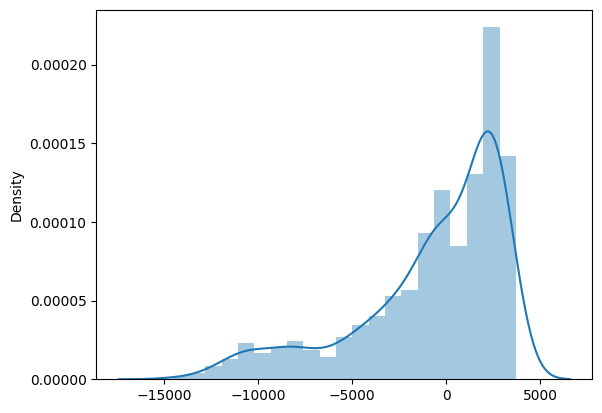

In [235]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

The problem with the distplot still remains, though the overpredicting is more balanced than before.

In [236]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [237]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [238]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Estimated price for this diamond:
801.12 $
----------------


The prediction is now higher than then the last two, it'S 370$ off, almost double the estimation. <br>
This could mean that this model is still very inacurrate or maybe the online tools are not that reliable <br>
It could still be that some type of diamonds just lost value in the time between the creation of the online tools and this dataset.

In [239]:
len(y_test)

8091

### Sixth model

Let's try to increase the node size.

In [240]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_13          │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,365 (263.14 KB)

 Trainable params: 67,347 (263.07 KB)

 Non-trainable params: 18 (72.00 B)

In [241]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 8949592.0000 - val_loss: 1454943.3750
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1913877.1250 - val_loss: 1217102.7500
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1794745.3750 - val_loss: 1103761.2500
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1685895.0000 - val_loss: 1047579.5000
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1685516.0000 - val_loss: 990868.8750
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1739270.5000 - val_loss: 1020724.0625
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1713454.2500 - val_loss: 988103.7500
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1688266.8750 - val_loss: 928074.1250
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1592526.7500 - val_loss: 916821.6875
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1714260.2500 - val_lo

<Axes: >

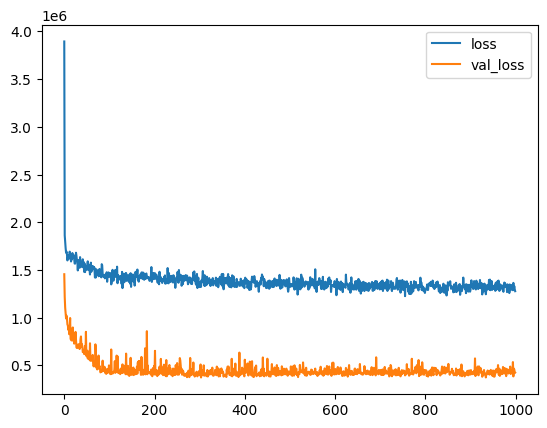

In [242]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Not that much changed.

In [243]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
538212.0

Train data evaluation:
403413.0


These numbers are 130 000$ apart.

In [244]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Test True Y,Model Predictions
0,3407,4234.124512
1,11631,10797.220703
2,18741,15225.370117
3,2285,2805.862061
4,648,663.506470
...,...,...
8086,1985,2200.183838
8087,475,623.323303
8088,2351,2469.584961
8089,945,1573.540527


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

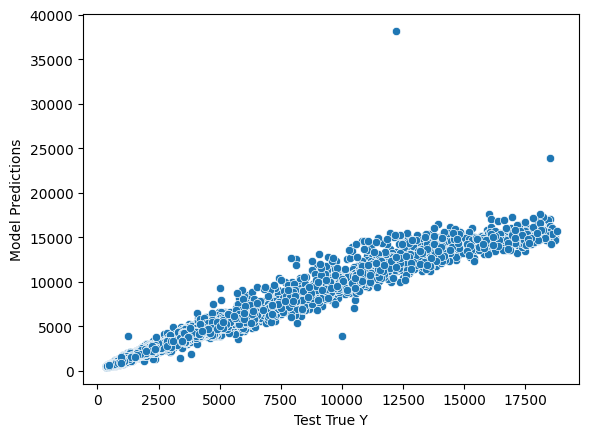

In [245]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

This scatterplot also seems to be more stable after 10 000$ but loses track after around 15 000$.

In [246]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
392.73 $

MSE
534417.79 $^2

RMSE:
731.04 $

R-squared:
0.97

Explained variance score:
0.97


These numbers didn't change that much, MAE and RMSE got a bit worse.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


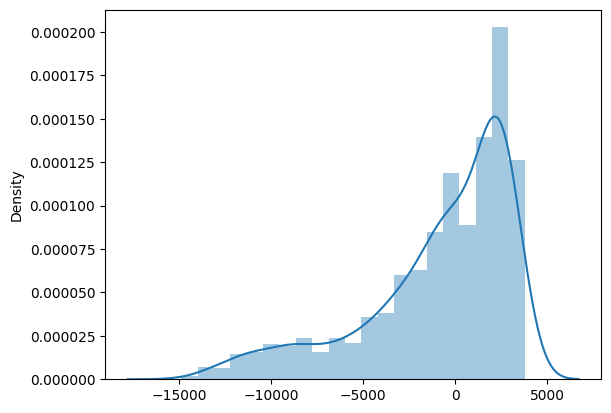

In [247]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

Still the same problem here.

In [248]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [249]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [250]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Estimated price for this diamond:
1199.97 $
----------------


Yeah no, this estimation is also very off.

In [251]:
len(y_test)

8091

### Seventh model

Let's try to add a batch normalization after each layer. Since the batch normalization was able to make big changes in the beginning, I hope this could make a difference as well.

In [252]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.BatchNormalization(),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.BatchNormalization(),
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_14          │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,413 (271.14 KB)

 Trainable params: 68,371 (267.07 KB)

 Non-trainable params: 1,042 (4.07 KB)

In [253]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))

Epoch 1/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 30516830.0000 - val_loss: 24878122.0000
Epoch 2/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 22253418.0000 - val_loss: 12957164.0000
Epoch 3/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 10945142.0000 - val_loss: 7341940.5000
Epoch 4/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4001509.5000 - val_loss: 19953528.0000
Epoch 5/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1797224.5000 - val_loss: 20988638.0000
Epoch 6/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1478673.6250 - val_loss: 66282084.0000
Epoch 7/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1492172.5000 - val_loss: 70559480.0000
Epoch 8/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1514381.7500 - val_loss: 71701640.0000
Epoch 9/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1395869.5000 - val_loss: 40067032.0000
Epoch 10/1000
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14067

<Axes: >

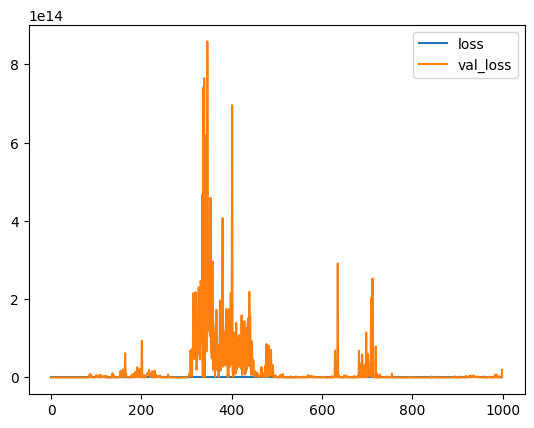

In [254]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

I'm not sure, but that does not look good.

In [255]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
11308887965696.0

Train data evaluation:
640999817216.0


These numbers got worse.

In [256]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Test True Y,Model Predictions
0,3407,3825.788818
1,11631,10463.094727
2,18741,14648.145508
3,2285,2791.611816
4,648,892.385437
...,...,...
8086,1985,2322.396973
8087,475,808.872986
8088,2351,2457.182861
8089,945,1412.921265


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

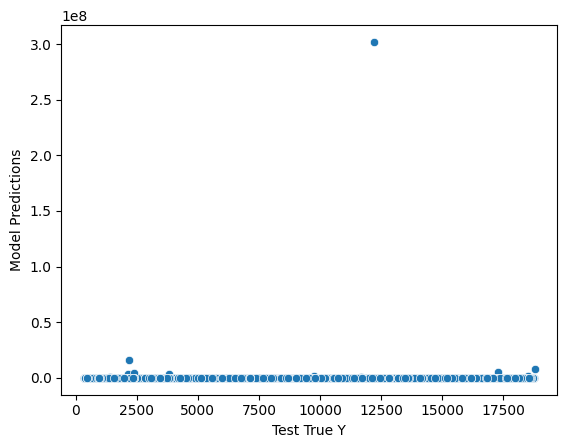

In [257]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

The scatterplot was also not very happy with the new model.

In [258]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
43767.99 $

MSE
11308888892897.11 $^2

RMSE:
3362869.15 $

R-squared:
-686071.44

Explained variance score:
-685957.73


How are these numbers even possible?

C:\Users\Startklar\AppData\Local\Temp\ipykernel_79584\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


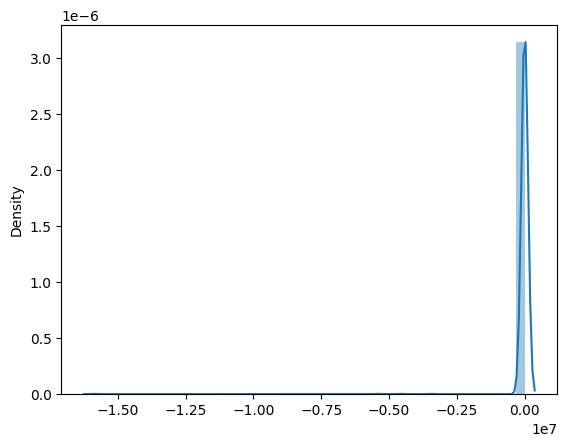

In [259]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

At least we now have a normal distribution, i guess.

In [260]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [261]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4,
            'depth' :     68.6, # => 2 * z / (x + y) * 100
            'table'  :    62.5,
            'x'   :       4.1,
            'y'  :        4.15,
            'z' :         2.83
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [262]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Estimated price for this diamond:
-829.29 $
----------------


Hm, stacking batch normalization does not work out as well as I'd hoped.

In [263]:
len(y_test)

8091

## Closing thoughts

There seem to have been many problem that were shared between a lot of those models.<br>
I think most of these problems can be explained by real world standards. Since diamond pricing may not always follow these quality regulations. <br>
On many of the online tools, you could also observe some other factors that determine the price that were not included in this dataset. The online calculators also include the shape of the diamond, the fluoresence, polish, symmetry and if it is lab grown or natural.<br>
Like mentioned before, a big reason for these larger variances could also be, that there are other factors, not even included in the online calculators that determine the pricing of a diamond. Things like historical importance, luxury pricing, brands. Maybe even the expertise of the seller. <br>
There could also be some problems with the dataset, even though it has around 50 000 rows. Since the calculations often times got less accurate in the higher priced categories, it seems that the dataset does not have that many data for these price ranges.<br>

After all of these considerations, I believe that the fifth model is the most accurate model I have created. It did not guess the sample diamond correctly, but it otherwise has created the best stats.